# Contexto

En el contexto del ruteo de visitadores médicos en hospitalización domiciliaria, se desea planificar la ruta de visita a 11 diferentes pacientes en diferentes zonas de la ciudad. El equipo de visitadores médicos debe salir de su base (ubicada en la coordenada $(27,6)$ ) y visitar cada uno de los pacientes. Como los visitadores médicos llevan consigo todo lo necesario para las visitas, no necesitan regresar a la base antes de terminar.

El objetivo es minimizar los costos de transporte, por lo que se desea diseñar la ruta más corta posible para el equipo de visitadores médicos. Se cuenta con información acerca de la localización geográfica de los pacientes en la tabla. Se puede asumir que en cualquier dirección el desplazamiento cuesta lo mismo, es decir, el costo no es afectado por las condiciones del tráfico en diferentes zonas.


|     Plataforma    |     Coordenadas    |           |
|-------------------|--------------------|-----------|
|                   |     x              |     y     |
|     0             |     27             |     6     |
|     1             |     25             |     38    |
|     2             |     41             |     22    |
|     3             |     43             |     29    |
|     4             |     16             |     17    |
|     5             |     25             |     9     |
|     6             |     12             |     2     |
|     7             |     45             |     2     |
|     8             |     6              |     13    |
|     9             |     35             |     43    |
|     10            |     44             |     45    |
|     11            |     30             |     48    |


Determine el orden de visita que minimizaría los costos para el prestador del servicio. Explique el procedimiento que utilizó para alcanzar dicha solución.

# Pruebas de diferentes mecanismos de solución

In [55]:
import numpy as np
import matplotlib.pyplot as plt

El primer paso es enumerar las localizaciones de los pacientes.

In [56]:
x=[27,25,41,43,16,25,12,45,6,35,44,30]
y=[6,38,22,29,17,9,2,2,13,43,45,48]

Necesitamos computar las distancias entre todos los puntos y, a partir de esto, construir una matriz de distancias que nos permita ya sea construir un modelo o usar un algoritmo para encontrar una buena  solución al problema.



In [57]:
distances=np.array([[np.round(((x[i]-x[j])**2+(y[i]-y[j])**2)**(1/2.),2) for j in range(len(y)) ] for i in range(len(x))])
print("Distancias entre pares:")
print(distances)

Distancias entre pares:
[[ 0.   32.06 21.26 28.02 15.56  3.61 15.52 18.44 22.14 37.85 42.54 42.11]
 [32.06  0.   22.63 20.12 22.85 29.   38.28 41.18 31.4  11.18 20.25 11.18]
 [21.26 22.63  0.    7.28 25.5  20.62 35.23 20.4  36.14 21.84 23.19 28.23]
 [28.02 20.12  7.28  0.   29.55 26.91 41.11 27.07 40.31 16.12 16.03 23.02]
 [15.56 22.85 25.5  29.55  0.   12.04 15.52 32.65 10.77 32.2  39.6  34.01]
 [ 3.61 29.   20.62 26.91 12.04  0.   14.76 21.19 19.42 35.44 40.71 39.32]
 [15.52 38.28 35.23 41.11 15.52 14.76  0.   33.   12.53 47.01 53.6  49.4 ]
 [18.44 41.18 20.4  27.07 32.65 21.19 33.    0.   40.52 42.2  43.01 48.38]
 [22.14 31.4  36.14 40.31 10.77 19.42 12.53 40.52  0.   41.73 49.68 42.44]
 [37.85 11.18 21.84 16.12 32.2  35.44 47.01 42.2  41.73  0.    9.22  7.07]
 [42.54 20.25 23.19 16.03 39.6  40.71 53.6  43.01 49.68  9.22  0.   14.32]
 [42.11 11.18 28.23 23.02 34.01 39.32 49.4  48.38 42.44  7.07 14.32  0.  ]]


Un primer paso consistirá en cosntruir la función `probar_solucion` que recibe como entrada un vector con el orden de visita, iniciando desde 0, y calcula el costo de la ruta propuesta.  *e.g.* 

```python 
solucion=[0,1,2,3,4,5,6,7,8,9,10,11]
probar_solucion(solucion,Matriz_distancias)
El costo de su solución es: 257.11
```

In [58]:
def probar_solucion(permutacion, dist):
    # permutacion: lista de índices de las ciudades en el orden de visita
    
    costo=0
    for i in range(len(permutacion)-1):
        costo+=dist[permutacion[i]][permutacion[i+1]]
    costo+=dist[permutacion[-1]][permutacion[0]]
    #print("El costo de su solución es:",costo)
    return costo

   

In [59]:
solucion=[0,1,2,3,4,5,6,7,8,9,10,11]
probar_solucion(solucion,distances)

299.22

Le podemos dar una mirada al instancia mediante la construcción y utilización de una función usada con ese propósito explícito.

In [60]:
import plotly.express as px
import plotly.graph_objects as go

# Plot the instance, use a different color fir the first location that has the index 0
def plot_instance(x,y,depot_index):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Clientes'))
  fig.add_trace(go.Scatter(x=[x[depot_index]], y=[y[depot_index]], mode='markers', name='Depósito', marker_color='red'))
  fig.show()
  
plot_instance(x,y,0)  

## ¿cuántas posubles soluciones tiene el problema?



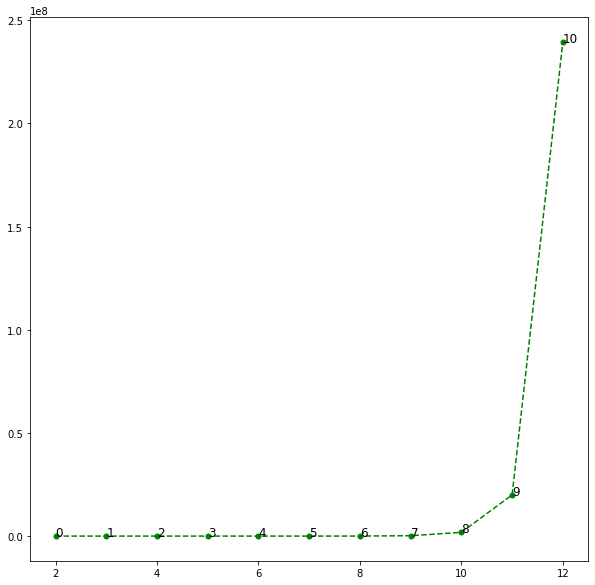

In [61]:
nodes=range(2,13)
import math as mth
fact=[mth.factorial(i)/2 for i in nodes]

plt.figure(figsize=(10,10))
plt.plot(nodes, fact, 'go--',  markersize=5)
cont=0
for xs, ys in zip(nodes, fact):
  plt.text(xs, ys, str(cont), color="black", fontsize=12)
  cont+=1


### Solución mediante métodos exactos

## Formulación del Modelo

### Conjuntos e Índices
$i \in I$: Índice y conjunto de ubicaciones de pacientes.


### Parámetros
$c_{i,j} \in \mathbb{R}^+$: Costo de transporte entre el paciente ubicado en la instalación $i \in J$ y el de la la ubicación  $j \in I$. Se asume que este costo es proporcional a la distancia entre la instalación y el cliente. Es decir, $c_{i,j} = \alpha \cdot d_{i,j}$, donde $\alpha$ es el costo por km de conducción.

### Variables de Decisión
$x_{ij} \in {0, 1 }$: Esta variable es igual a 1 si se realiza un viaje entre $i$ y $j$; y 0 en caso contrario.

### Función Objetivo

Costos totales. Queremos minimizar el costo total del recorrido.

\begin{equation}
\text{Min} \quad Z = \sum_{i \in I}\sum_{j \in I} x_{ij} \cdot c_{ij} 
\tag{0}
\end{equation}

### Restricciones
#### Demanda.

Cada paciente $j \in I$ recibe una única visita
\begin{equation}
\sum_{i \in I} x_{i,j} = 1 \quad \forall j \in I
\tag{1}
\end{equation}

Los visitadores que visitan un paciente $i \in I$ salen de allí hacia otro paciente o a el depósito, desde el que partieron.
\begin{equation}
\sum_{j \in I} x_{i,j} = 1 \quad \forall i \in I
\tag{1}
\end{equation}

In [62]:
!pip install pulp

In [63]:
import pulp as plp

model=plp.LpProblem("TSP", plp.LpMinimize)
solver=plp.PULP_CBC_CMD(msg=0)

x_vars=plp.LpVariable.dicts("x", [(i,j) for i in range(12) for j in range(12)], cat="Binary")

model+=plp.lpSum([distances[i][j]*x_vars[(i,j)] for i in range(12) for j in range(12)])

for i in range(12): 
    model+=plp.lpSum([x_vars[(i,j)] for j in range(12) if j!=i])==1
    
for j in range(12):
    model+=plp.lpSum([x_vars[(i,j)] for i in range(12) if i!=j])==1

model.solve(solver)




1

A continuación debemos validar que la solución es factible.

In [64]:
for v in model.variables():
    if v.varValue>0.5:
        print(v.name, "=", v.varValue)

x_(0,_5) = 1.0
x_(1,_11) = 1.0
x_(10,_9) = 1.0
x_(11,_1) = 1.0
x_(2,_3) = 1.0
x_(3,_2) = 1.0
x_(4,_8) = 1.0
x_(5,_7) = 1.0
x_(6,_4) = 1.0
x_(7,_0) = 1.0
x_(8,_6) = 1.0
x_(9,_10) = 1.0


In [77]:
def plot_solution(xs,ys,order):
    
    """Plot the solution
    
    Depicts the solution in a plot
    """
    plt.figure(figsize=(10,10))
    plt.plot(xs, ys, 'go',  markersize=5)
    cont=0
    for x, y in zip(xs, ys):
        plt.text(x, y, str(cont), color="black", fontsize=12)
        cont+=1
    plt.plot([xs[order[i]] for i in range(len(order))]+[xs[order[0]]],[ys[order[i]] for i in range(len(order))]+[ys[order[0]]],'r--')
    plt.show()

def get_path_recursive(x, i, path):
    """ Retornar el camino recorrido desde el nodo i, si la solución es óptima, el camino debe ser único
    y debe ser un ciclo que incluya todos los nodos. De lo contrario, la solución no es óptima.
    """
    path.append(i)
    for j in range(12):
        if x[(i,j)].varValue==1 and j not in path:
            get_path_recursive(x, j, path)
            break
        
        

  

Se usan las funciones previas para evaluar la solución inicialmente propuesta.

In [78]:
print("Optimization status (modelo):", plp.LpStatus[model.status])
subtours =[] 
get_path_recursive(x_vars, 0, subtours)    
print("La ruta es:", subtours, " y visita", len(subtours), "nodos")

Optimization status (modelo): Optimal
La ruta es: [0, 7, 2, 3, 10, 9, 11, 1, 4, 8, 6, 5]  y visita 12 nodos


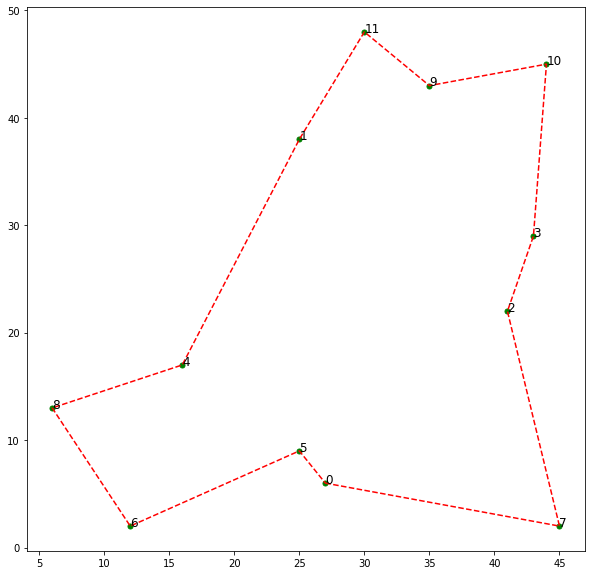

In [79]:
plot_solution(x,y,subtours)

### si la solución no es óptima, es necesario eliminar los subciclos

Sea $\cal S$ el conjunto de nodos que aparecen en un subtour. Para eliminar el subciclo agregamos la restricción:

\begin{equation}
\sum_{i \in {\cal S}} \sum_{j \in {\cal S} | j \neq i}  x_{i,j} \leq |{\cal S}|-1 | \quad \forall  {\cal S}\subseteq I
\tag{1}
\end{equation}

In [81]:


print("Status:", plp.LpStatus[model.status])
subtours =[] 
get_path_recursive(x_vars, 0, subtours)
while len(subtours) < 12:

    model+=plp.lpSum([x_vars[(i,j)] for i in subtours for j in subtours if i!=j])<=len(subtours)-1
    model.solve()
    subtours =[] 
    get_path_recursive(x_vars, 0, subtours)  
    plot_solution(x,y,subtours)  

subtours =[] 
get_path_recursive(x_vars, 0, subtours)

print("costo:", plp.value(model.objective))

Status: Optimal
costo: 154.14000000000001


# Métodos aproximados

In [82]:
# Método del barrido para generar soluciones iniciales
import plotly.express as px
import plotly.graph_objects as go

def compute_angle_grad(point1,point2):
    """Compute the angle between two points in degrees"""
    x1,y1 = point1
    x2,y2 = point2
    if np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi < 0:
        return 360 + np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    else:
        return np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi

def plot_star_from_selected_points(x,y,starting_point):

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Clientes'))
    fig.add_trace(go.Scatter(x=[x[starting_point]], y=[y[starting_point]], mode='markers', name='Depósito', marker_color='red'))
    # draw the star from the selected point
    for i in range(len(x)):
        if i != starting_point:
            fig.add_trace(go.Scatter(x=[x[starting_point], x[i]], y=[y[starting_point], y[i]], mode='lines',  line_color='green'))
    fig.show()
    
plot_star_from_selected_points(x,y,3)


In [83]:
def initial_solution_sweep_method(xs,ys,initial_point):
    """Compute the initial solution using the sweep method"""
    # Compute the angles of the points with respect to the initial point
    angles = []
    for i in range(len(xs)):
        angles.append(compute_angle_grad((xs[initial_point],ys[initial_point]),(xs[i],ys[i])))
    # Sort the points with respect to the angle
    sorted_points = sorted(zip(angles,range(len(xs))))
    # Extract the order of the points
    order = [point[1] for point in sorted_points]
    return order



    

    

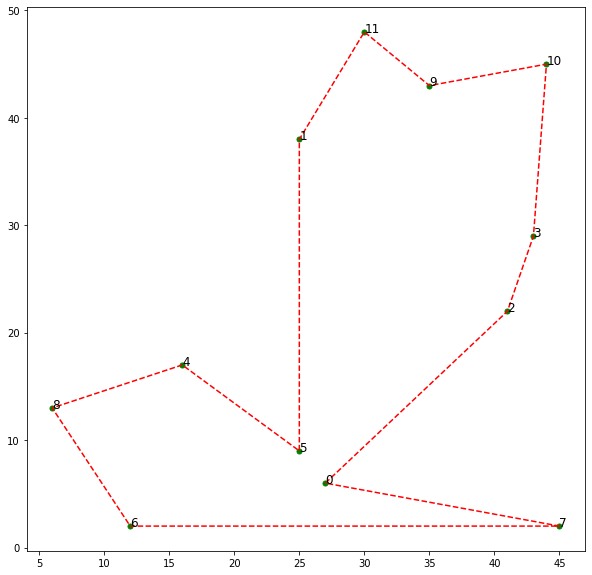

Solución inicial con punto inicial 0 costo: 187.82


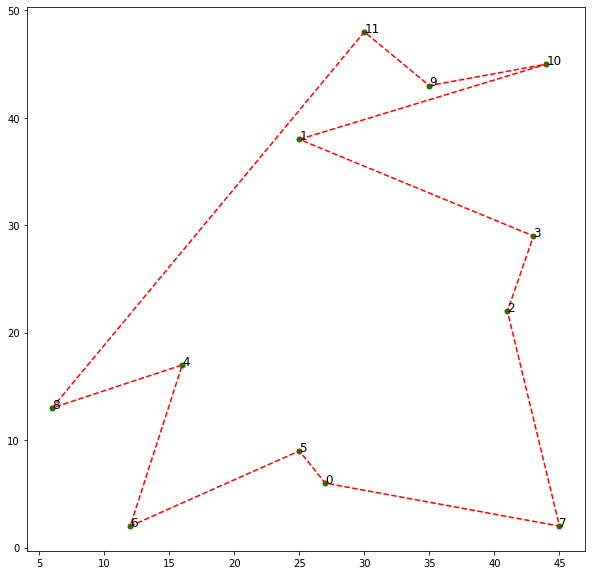

Solución inicial con punto inicial 1 costo: 189.88


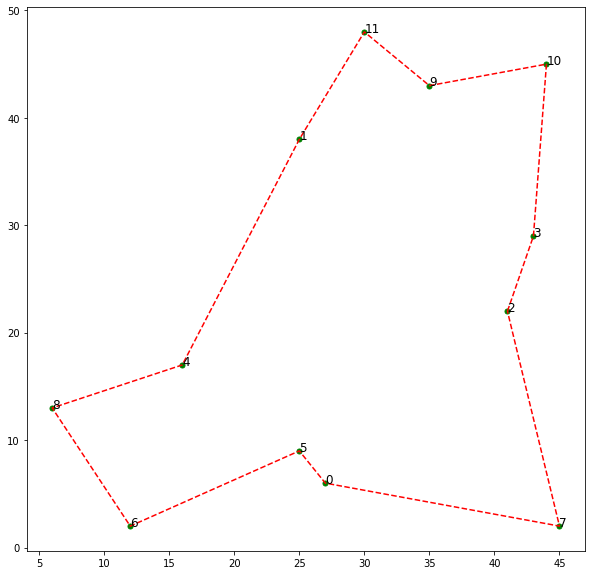

Solución inicial con punto inicial 2 costo: 154.14000000000001


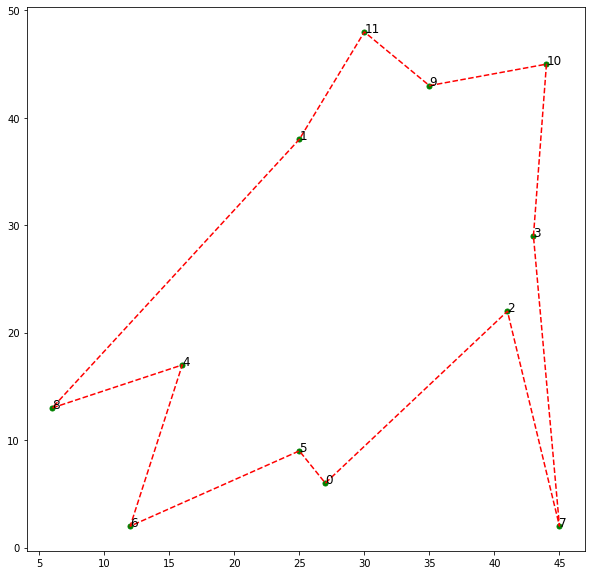

Solución inicial con punto inicial 3 costo: 188.29


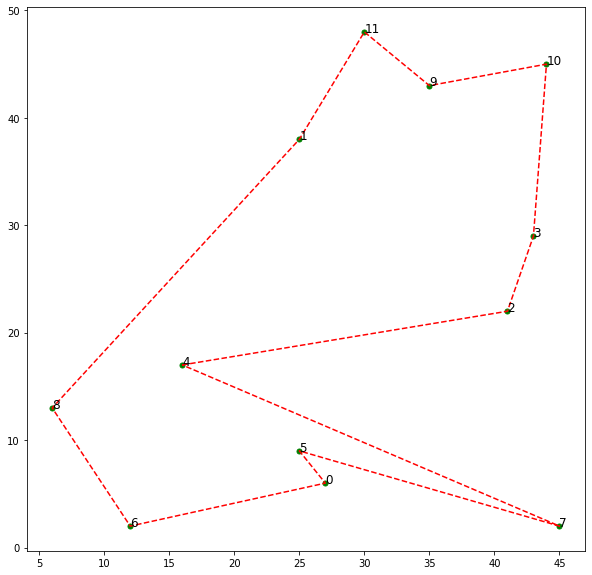

Solución inicial con punto inicial 4 costo: 193.18000000000004


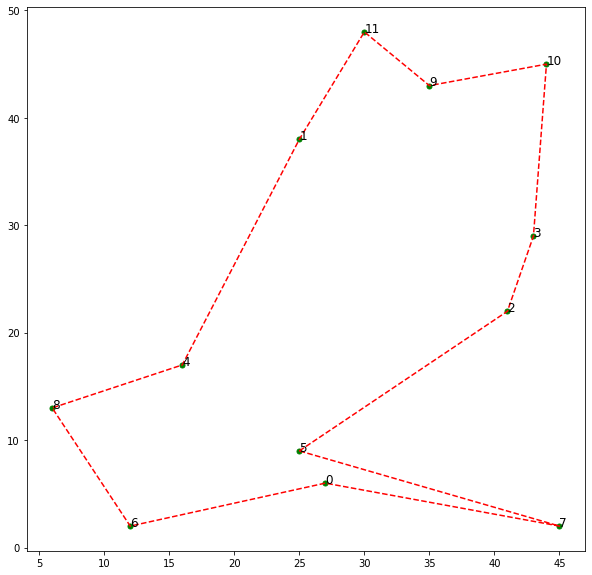

Solución inicial con punto inicial 5 costo: 172.7


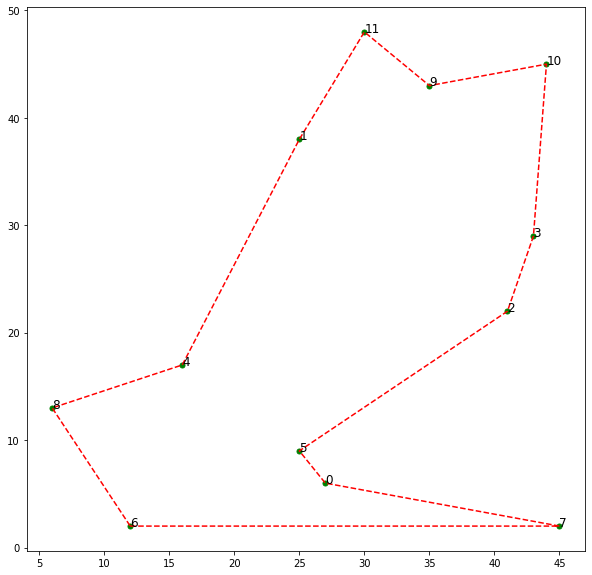

Solución inicial con punto inicial 6 costo: 172.60000000000002


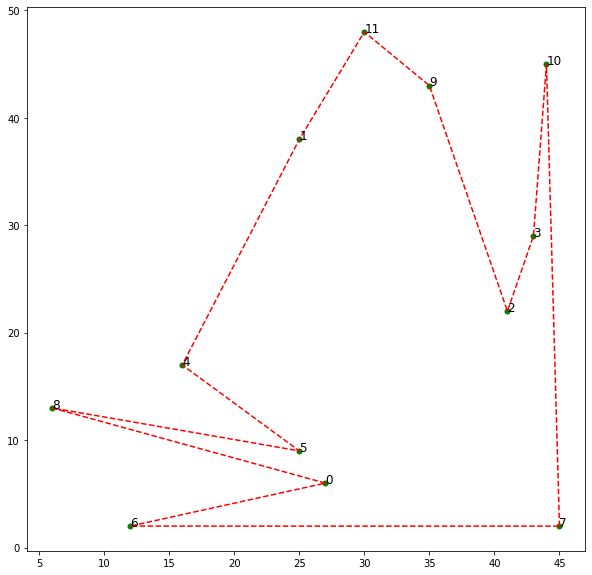

Solución inicial con punto inicial 7 costo: 231.37999999999997


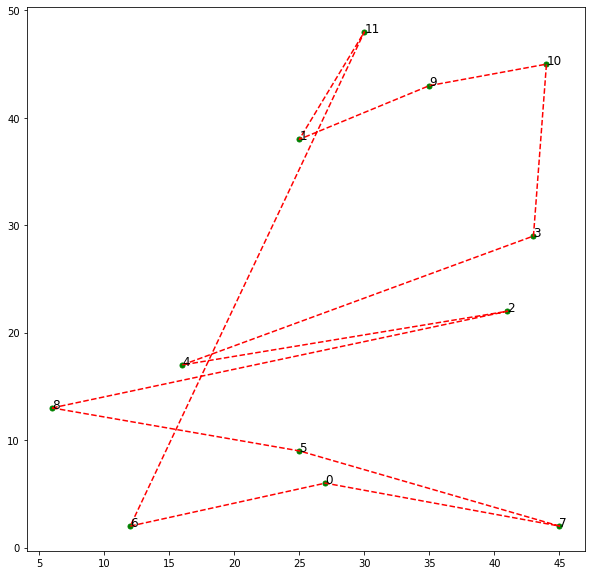

Solución inicial con punto inicial 8 costo: 262.77000000000004


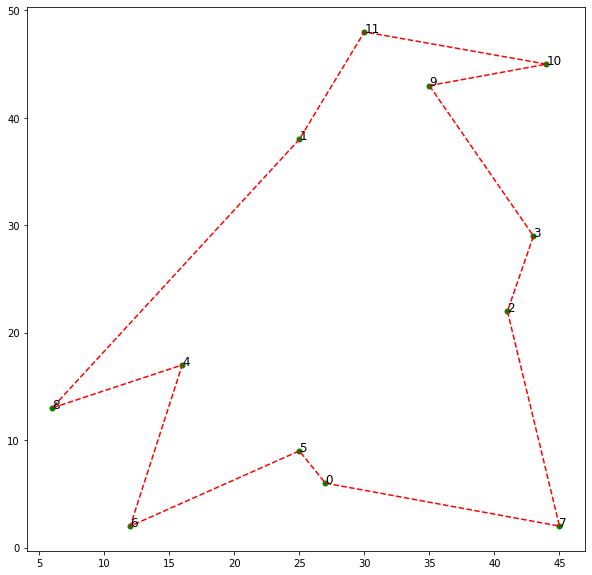

Solución inicial con punto inicial 9 costo: 173.02


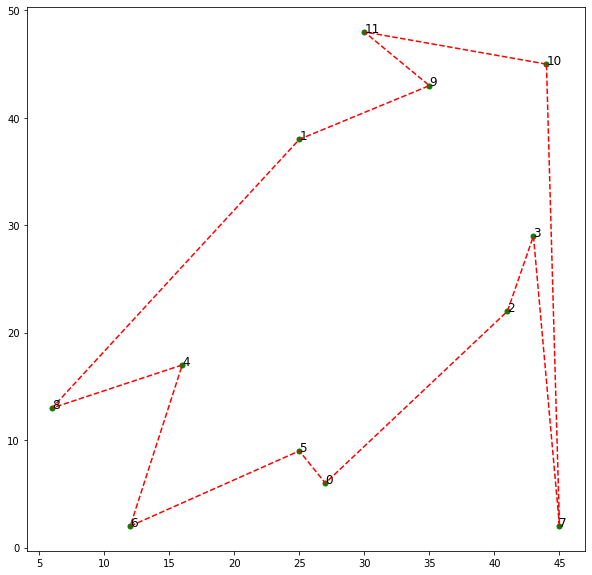

Solución inicial con punto inicial 10 costo: 207.24999999999997


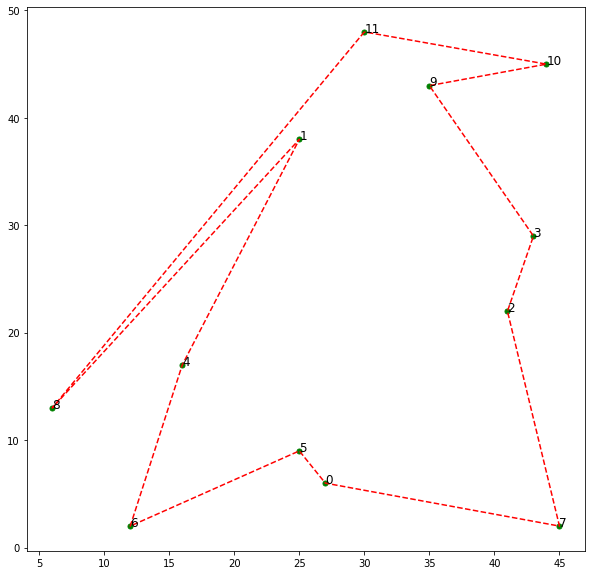

Solución inicial con punto inicial 11 costo: 216.36


In [85]:
for i in range(12):
  
  
  sol=initial_solution_sweep_method(x,y,i)
  costo=probar_solucion(sol, distances)
  plot_solution(x,y,sol)
  print("Solución inicial con punto inicial",i,"costo:", costo)

In [ ]:
theta={}
base_node=0
for i in range(1,len(x)):
  theta[i]=compute_angle_grad((x[base_node],y[base_node]),(x[i],y[i]))

print("Ángulos de los nodos respecto al nodo 0:")
print(theta)

In [ ]:
plot_solution(x,y,subtours)
probar_solucion(subtours, distances)

#### En el caso tal que la instancia a resolver sea muy grande es posible usar algoritmos heurísticos (por ejemplo la heurística LKH) o metaheurísticos para dar solución de manera aproximada al problema.

A continuación un ejemplo sencillo utilizandod Iterated local search.

In [ ]:
from copy import deepcopy
from itertools import product
# construct the solution using iterated local search
def perturbation(sol):
    """Perturbation operator"""
    # Select two random positions
    pos1 = np.random.randint(0,len(sol))
    pos2 = np.random.randint(0,len(sol))
    # Swap the elements in the positions
    sol[pos1],sol[pos2] = sol[pos2],sol[pos1]
    return sol

def generate_initial_sol(sol):
    """Generate an initial solution"""
    # Generate a random permutation
    sol = np.random.permutation(sol)
    return sol

def two_opt_operator(sol,distances):
    """2-opt operator"""
    # Select two random positions
    best_sol=deepcopy(sol)
    improved=True
    while(improved):
        improved=False
        for i in range(len(sol)):
            for j in range(i+1,len(sol)):
                if j-i==1:
                    continue
                new_sol=deepcopy(best_sol)
                new_sol[i:j]=list(reversed(new_sol[i:j]))
                if probar_solucion(new_sol,distances)<probar_solucion(best_sol,distances):
                    best_sol=deepcopy(new_sol)
                    improved=True
    return best_sol

        
def compute_distances(x,y):
    distances=np.array([[np.round(((x[i]-x[j])**2+(y[i]-y[j])**2)**(1/2.),2) for j in range(len(y)) ] for i in range(len(x))])
    return distances
    

def iterated_local_search_TSP(x,y):
    distances = compute_distances(x,y)
    
   # Probamos dos distintos métodos para generar soluciones iniciales 
    # 1. Completamente aleatoria
    best_sol = generate_initial_sol(range(len(x)))
    best_f = probar_solucion(best_sol,distances)
    
    # 2. método del barrido
    for i in range(len(x)):
            sol = initial_solution_sweep_method(x,y,i)
            f = probar_solucion(sol,distances)
            if f<best_f:
                best_f=f
                best_sol=deepcopy(sol)
                print("Solución inicial:",best_f)    
    
    
    no_improvement=0
    while no_improvement<100:
        
        # Perturb the solution
        sol = perturbation(deepcopy(best_sol))
        # Apply the 2-opt operator
        sol = two_opt_operator(sol,distances)
        # Evaluate the solution
        f = probar_solucion(sol,distances)
        # If the solution is better, update the best solution
        if f<best_f:
            best_f=f
            best_sol=deepcopy(sol)
            no_improvement=0
            print("Solución mejorada:",best_f)
        else:
            no_improvement+=1
    
    return best_sol

sol=iterated_local_search_TSP(x,y)
print("Solución final:",sol,' costo: ' ,probar_solucion(sol,distances))